In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os.path
import pathlib

In [2]:
cwd = pathlib.Path().resolve()
src = cwd.parent
data = src.parent.parent.parent

data_path = os.path.join(data, 'OneDrive - Delft University of Technology', 'TU Delft', 'Master ENVM', 'MDP', 'Model', 'Data', 'TAHMO')

In [3]:
data_files = glob.glob(os.path.join(data_path, '*.csv'))

dataframes = {}

for file in data_files:
    station_name = os.path.splitext(os.path.basename(file))[0].split('_')[0]
    df = pd.read_csv(file, index_col = 0, sep =',', parse_dates = True)
    dataframes[station_name] = df

In [4]:
dataframes_keys = list(dataframes.keys())
dataframes_keys


['TA00023',
 'TA00024',
 'TA00026',
 'TA00067',
 'TA00074',
 'TA00080',
 'TA00108',
 'TA00130',
 'TA00133',
 'TA00156',
 'TA00157',
 'TA00166',
 'TA00172',
 'TA00189',
 'TA00190',
 'TA00196']

In [5]:
# change all index to datetime for all df in dictionary
for key, df in dataframes.items():
    df.index = pd.to_datetime(df.index)

    if 'te' in df.columns:
        # Access the 'te' column
        df_temp = df['te']
        # Perform further operations with df_temp
    else:
        print(f"'te' column not found in DataFrame with key '{key}'")
    
    df_temp_mean = df_temp.resample('D').mean()
    df_temp_min = df_temp.resample('D').min()
    df_temp_max = df_temp.resample('D').max()

    df['te_mean'] = df_temp_mean
    df['te_min']= df_temp_min
    df['te_max'] = df_temp_max

    if 'pr' in df.columns:
        df_pr = df['pr']

    else: 
        print(f"'pr' column not found in DataFrame with key '{key}'")
    
    df_pr = df_pr.resample('D').sum()

    df['pr'] = df_pr


    

'te' column not found in DataFrame with key 'TA00080'
'pr' column not found in DataFrame with key 'TA00080'
'te' column not found in DataFrame with key 'TA00166'
'pr' column not found in DataFrame with key 'TA00166'


In [6]:
dataframes


{'TA00023':                        te   pr     ra  te_mean  te_min  te_max
 Timestamp                                                     
 2018-03-16 08:15:00  27.4  NaN  834.0      NaN     NaN     NaN
 2018-03-16 08:20:00  27.3  NaN  643.0      NaN     NaN     NaN
 2018-03-16 08:25:00  27.3  NaN  805.0      NaN     NaN     NaN
 2018-03-16 08:30:00  27.2  NaN  728.0      NaN     NaN     NaN
 2018-03-16 08:35:00  27.2  NaN  676.0      NaN     NaN     NaN
 ...                   ...  ...    ...      ...     ...     ...
 2023-12-30 23:40:00  22.4  NaN    0.0      NaN     NaN     NaN
 2023-12-30 23:45:00  22.4  NaN    0.0      NaN     NaN     NaN
 2023-12-30 23:50:00  22.3  NaN    0.0      NaN     NaN     NaN
 2023-12-30 23:55:00  22.3  NaN    0.0      NaN     NaN     NaN
 2023-12-31 00:00:00  22.4  0.0    0.0     22.4    22.4    22.4
 
 [608694 rows x 6 columns],
 'TA00024':                        te    pr   ra    te_mean  te_min  te_max
 Timestamp                                         

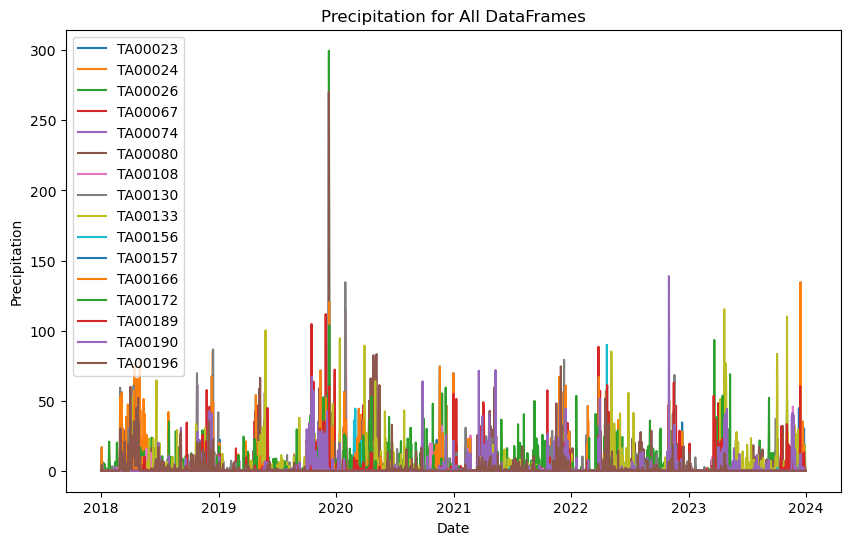

In [7]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each DataFrame in the dictionary
for key, df in dataframes.items():
    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)
    
    # Check if the 'te' column exists in the DataFrame
    if 'pr' in df.columns:
        # Access the 'te' column
        df_pr = df['pr']
        
        # Resample the 'te' column to daily frequency and calculate mean
        df_pr = df_pr.resample('D').sum()
        
        # Plot the mean temperature data
        ax.plot(df_pr.index, df_pr.values, label=key)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
ax.set_title('Precipitation for All DataFrames')
ax.legend()

# Show the plot
plt.show()

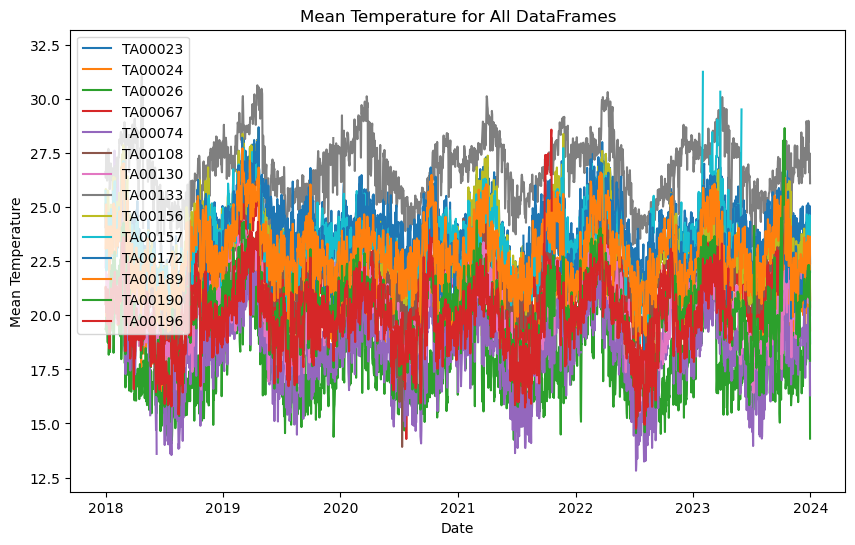

In [8]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over each DataFrame in the dictionary
for key, df in dataframes.items():
    # Convert the index to datetime
    df.index = pd.to_datetime(df.index)
    
    # Check if the 'te' column exists in the DataFrame
    if 'te' in df.columns:
        # Access the 'te' column
        df_temp = df['te']
        
        # Resample the 'te' column to daily frequency and calculate mean
        df_temp_mean = df_temp.resample('D').mean()
        
        # Plot the mean temperature data
        ax.plot(df_temp_mean.index, df_temp_mean.values, label=key)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Mean Temperature')
ax.set_title('Mean Temperature for All DataFrames')
ax.legend()

# Show the plot
plt.show()


In [9]:
def Extra_rad(Tmax, Tmin, df, lat):
    "Calculation of Extraterrestrial radiation"
    G = 0.0820 #* 10 ** 6 # J/m^2/min  --> Constant value

    # Calculation of the radian location of the station
    phi = np.pi / 180 * lat

    # Calculation of the number of the day in a year
    J = df.index.dayofyear.values  # Extract day of the year directly from the index

    # Calculation of the extraterrestrial radiation: Ra
    dr = 1 + 0.033 * np.cos(2 * np.pi * J / 365)
    delta = 0.409 * np.sin((2 * np.pi * J / 365) - 1.39)
    w = np.arccos(- np.tan(phi) * np.tan(delta))
    Ra = ((24 * 60) / np.pi) * G * dr * (w * np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.sin(w)) #* 10 ** - 6

    # Create a DataFrame with Ra values and corresponding timestamps
    Ra_df = pd.DataFrame({'Ra': Ra}, index=df.index)

    return Ra_df